<a href="https://colab.research.google.com/github/minjung21/Final-Team9/blob/main/%EB%A9%8B%EC%82%AC_%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_20250923.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가설 - (영화의 제작) 국가에 따라 흥행하는 장르는 다를 것이다.
흥행 기준
- SR
- ROI
- revenue -> **블록버스터, 상업, 독립영화 구분**
---
**블록버스터, 상업, 독립영화 구분**

budget 값, 메이져 스튜디오 리스트 구분 -> 실패

머신러닝(k-means, 덴다이어그램) 군집화 ->

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/TMDB_processed.csv')

In [4]:
# 'production_companies' 컬럼이 null인 행 삭제
df = df.dropna(subset=['production_companies'])

In [5]:
df.to_csv("TMDB_processed_production_companies.csv", index=False, encoding='utf-8-sig')

In [6]:
df[df['production_companies'].isnull()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,director,cast,ROI,SR


In [7]:
import pandas as pd
import numpy as np

# === 1. CSV 파일 불러오기 ===
df = pd.read_csv("/content/TMDB_processed_production_companies.csv")

# 데이터 크기, 컬럼 확인
print("데이터 크기:", df.shape)
print("컬럼 목록:", df.columns.tolist())

# === 2. revenue 분포를 확인해서 기준선 결정(예시) ===
print("revenue 통계량:")
print(df['revenue'].describe())  # 평균, 사분위수 등 확인

# === 3. 기준선을 이용해 영화 타입 분류 ===
# 예시 기준
#   revenue >= 100,000,000 → 블록버스터(2)
#   50,000,000 <= revenue < 100,000,000 → 상업영화(1)
#   revenue < 50,000,000 → 독립영화(0)
conditions = [
    df['revenue'] >= 100_000_000,
    (df['revenue'] >= 50_000_000) & (df['revenue'] < 100_000_000),
    df['revenue'] < 50_000_000
]
choices = [2, 1, 0]

df['movie_type'] = np.select(conditions, choices, default=np.nan)

# === 4. 결과 미리보기 ===
print(df[['title', 'revenue', 'movie_type']].head())

# === 5. 새로운 CSV 파일로 저장 ===
df.to_csv("/content/TMDB_with_movie_type.csv", index=False)
print("저장 완료: /content/TMDB_with_movie_type.csv")


데이터 크기: (2400, 25)
컬럼 목록: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'director', 'cast', 'ROI', 'SR']
revenue 통계량:
count    2.400000e+03
mean     2.103014e+08
std      2.618991e+08
min      9.656800e+04
25%      5.324209e+07
50%      1.261432e+08
75%      2.601975e+08
max      2.923706e+09
Name: revenue, dtype: float64
             title     revenue  movie_type
0        Inception   825532764         2.0
1     Interstellar   701729206         2.0
2  The Dark Knight  1004558444         2.0
3           Avatar  2923706026         2.0
4     The Avengers  1518815515         2.0
저장 완료: /content/TMDB_with_movie_type.csv


원본 데이터 로드 완료. 행,열: (9107, 25)
사용할 피처: ['budget', 'revenue', 'ROI', 'SR', 'vote_average', 'vote_count', 'popularity', 'runtime']
로그 변환 적용된 컬럼: ['budget', 'revenue', 'popularity', 'vote_count', 'runtime']
ROI 음수 포함 - shift + log 처리

-- 군집 중심 (원래 스케일, 단 로그 변환된 컬럼은 로그 스케일) --


,budget,revenue,SR,vote_average,vote_count,popularity,runtime,ROI
cluster_0,15.913307,15.258898,0.185965,6.152308,5.406555,2.421497,4.670854,4.100217
cluster_1,16.199073,17.901995,2.565229,6.774896,7.157165,3.100181,4.707927,6.313230
cluster_2,5.865495,6.030012,0.770186,8.464282,1.009114,0.569466,2.272019,4.872486



클러스터 -> 영화타입 매핑(예): {1: 2, 0: 1, 2: 0}

-- 군집별 요약(영화타입 기준) --


budget                           revenue                \
                   count          mean      median   count          mean   
kmeans_movie_type                                                          
0                    483  3.857668e+04       300.0     483  7.383623e+04   
1                   4843  2.002060e+07  11000000.0    4843  1.801475e+07   
2                   3781  3.560266e+07  15000000.0    3781  1.505062e+08   

                                ROI                               SR  ...  \
                       median count           mean      median count  ...   
kmeans_movie_type                                                     ...   
0                       288.0   483   20215.509580    0.000000   483  ...   
1                   6463286.0  4843       5.351302  -18.520988  4843  ...   
2                  72617068.0  3781  116406.392831  339.577424  3781  ...   

                  vote_average vote_count                      popularity  \
                        median      count         mean  median      count   
kmeans_movie_type                                                           
0                        9.500        483     5.080745     1.0        483   
1                        6.203       4843   628.659715   285.0       4843   
2                        6.800       3781  3218.132240  1647.0       3781   

                                     runtime                     
                        mean  median   count        mean median  
kmeans_movie_type                                                
0                   1.009603   0.600     483   29.830228   10.0  
1                  13.115846  11.870    4843  107.658270  104.0  
2                  33.164637  20.444    3781  111.885480  108.0  

[3 rows x 24 columns]


Silhouette score: 0.3220


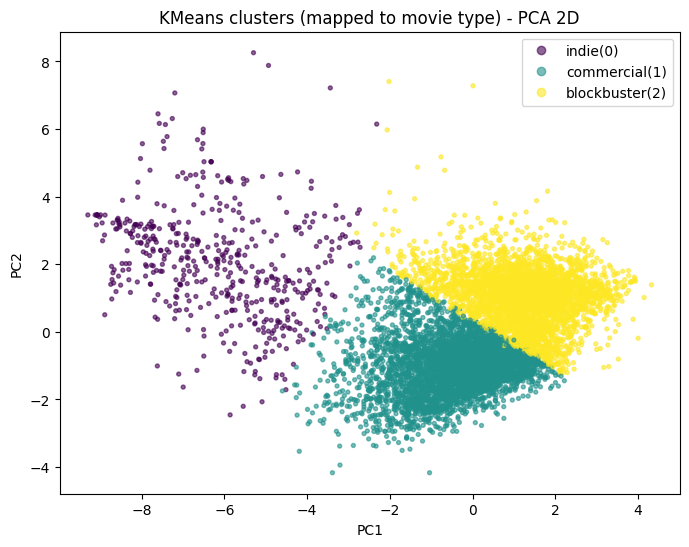


저장 완료: /content/TMDB_with_kmeans_movie_type.csv
원본 df에 'kmeans_cluster'와 'kmeans_movie_type' 컬럼이 추가되었습니다.


In [8]:
# ===== K-Means 기반 영화 유형 분류 (블록버스터/상업/독립) =====
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

# ---------- (1) 사용자 설정 ----------
df_path = "/content/TMDB_processed.csv"
output_path = "/content/TMDB_with_kmeans_movie_type.csv"

# 사용할 피처 목록: 필요하면 추가/제거하세요
features = [
    "budget", "revenue", "ROI", "SR",
    "vote_average", "vote_count", "popularity", "runtime"
]

random_state = 42
n_clusters = 3

# ---------- (2) 데이터 로드 ----------
if not os.path.exists(df_path):
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {df_path}\nColab 사용 시, 먼저 파일을 /content에 업로드하세요.")

df = pd.read_csv(df_path)
print("원본 데이터 로드 완료. 행,열:", df.shape)

# ---------- (3) 피처 존재 확인 및 준비 ----------
# 존재하지 않는 피처는 제거
use_features = [f for f in features if f in df.columns]
if len(use_features) == 0:
    raise ValueError("데이터에 사용할 피처가 없습니다. features 목록과 컬럼명을 확인하세요.")
print("사용할 피처:", use_features)

X = df[use_features].copy()

# ---------- (4) 결측치/무한치 처리 ----------
# 무한대 -> NaN, NaN은 중앙값으로 대체
X = X.replace([np.inf, -np.inf], np.nan)
medians = X.median()
X = X.fillna(medians)

# ---------- (5) 로그 변환 (skewed numeric) ----------
# revenue, budget 같은 양수 스케일 특징은 로그 변환하면 KMeans가 더 안정적일 수 있음.
# 음수/0 처리: +1 후 로그 (만약 음수 값이 있으면 offset을 더 크게 조정 필요)
log_cols = []
for col in ["budget", "revenue", "popularity", "vote_count", "runtime"]:
    if col in X.columns:
        # if all values >= 0, use log1p; else skip or shift
        if (X[col] >= 0).all():
            X[col] = np.log1p(X[col])
            log_cols.append(col)

print("로그 변환 적용된 컬럼:", log_cols)

# ROI, SR 등은 분포에 따라 그대로 두거나 필요시 로그 변환할 수 있음.
# 예: ROI가 매우 크면 아래 코드 사용 가능:
if "ROI" in X.columns:
    # ROI can be negative; shift if necessary
    min_roi = X["ROI"].min()
    if min_roi <= 0:
        X["ROI_shifted"] = X["ROI"] - min_roi + 1.0  # 모든 값을 양수로
        X["ROI_shifted"] = np.log1p(X["ROI_shifted"])
        X = X.drop(columns=["ROI"]).rename(columns={"ROI_shifted":"ROI"})
        print("ROI 음수 포함 - shift + log 처리")
    else:
        X["ROI"] = np.log1p(X["ROI"])
        print("ROI 양수 - log1p 처리")

# SR이 범주형(예: 0,1,2,3)이면 그대로 두기. 숫자형이지만 범주라면 OneHot 권장 (여기선 그대로 사용)

# ---------- (6) 표준화 ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- (7) K-Means 학습 ----------
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=20)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# ---------- (8) 군집 중심을 원래 스케일로 변환해서 해석 ----------
centers_scaled = kmeans.cluster_centers_
# 역변환: scaler.inverse_transform
centers_original = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=X.columns)
centers_df.index = [f"cluster_{i}" for i in range(n_clusters)]
print("\n-- 군집 중심 (원래 스케일, 단 로그 변환된 컬럼은 로그 스케일) --")
display(centers_df)

# ---------- (9) 군집을 영화 타입(0,1,2)으로 매핑 ----------
# 일반적인 기준: revenue가 높은 군집 -> 블록버스터(2), 중간 -> 상업(1), 낮음 -> 독립(0)
# revenue 컬럼이 로그 변환되어 있다면 centers_df['revenue']는 로그값입니다. 그래도 순서 비교 가능
if "revenue" in centers_df.columns:
    revenue_by_cluster = centers_df["revenue"]
else:
    # revenue가 없으면 budget 기반으로 매핑
    revenue_by_cluster = centers_df[centers_df.columns.intersection(["budget", "ROI"])].mean(axis=1)

# 클러스터 인덱스를 revenue 기준으로 정렬 (내림차순)
cluster_order = revenue_by_cluster.sort_values(ascending=False).index.tolist()
# cluster_order e.g. ['cluster_1','cluster_0','cluster_2'] (높음->낮음)
# 매핑 dict: highest -> 2 (블록버스터), middle -> 1, lowest -> 0
cluster_to_type = {}
sorted_clusters = [int(c.split("_")[1]) for c in cluster_order]
mapping_values = [2, 1, 0]  # highest->2, middle->1, lowest->0
for cl_idx, m in zip(sorted_clusters, mapping_values):
    cluster_to_type[cl_idx] = m

print("\n클러스터 -> 영화타입 매핑(예):", cluster_to_type)

# apply mapping
predicted_type = np.array([cluster_to_type[c] for c in cluster_labels])

# ---------- (10) 원본 데이터프레임에 결과 합치기 ----------
df_out = df.copy()
df_out["kmeans_cluster"] = cluster_labels
df_out["kmeans_movie_type"] = predicted_type  # 0=독립,1=상업,2=블록버스터

# ---------- (11) 군집 통계 및 품질 지표 ----------
summary = df_out.groupby("kmeans_movie_type")[use_features].agg(["count", "mean", "median"])
print("\n-- 군집별 요약(영화타입 기준) --")
display(summary)

# silhouette score (참고: 샘플 수 > n_clusters)
try:
    sil = silhouette_score(X_scaled, cluster_labels)
    print(f"\nSilhouette score: {sil:.4f}")
except Exception as e:
    print("Silhouette score 계산 불가:", e)

# ---------- (12) 2D 시각화 (PCA) ----------
pca = PCA(n_components=2, random_state=random_state)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=predicted_type, cmap="viridis", alpha=0.6, s=8)
plt.title("KMeans clusters (mapped to movie type) - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(handles=scatter.legend_elements()[0], labels=["indie(0)","commercial(1)","blockbuster(2)"])
plt.show()

# ---------- (13) 결과 저장 ----------
df_out.to_csv(output_path, index=False)
print(f"\n저장 완료: {output_path}")
print("원본 df에 'kmeans_cluster'와 'kmeans_movie_type' 컬럼이 추가되었습니다.")


In [9]:
import numpy as np
from sklearn.metrics import pairwise_distances

# 1) 각 샘플 → 모든 군집 중심까지 거리 행렬
dist_matrix = pairwise_distances(X_scaled, kmeans.cluster_centers_)  # (n_samples, n_clusters)

# 2) 가장 가까운 중심(1위), 두 번째 중심(2위) 인덱스와 거리
idx_sorted = np.argsort(dist_matrix, axis=1)
closest_idx = idx_sorted[:, 0]
second_idx  = idx_sorted[:, 1]

closest_dist = dist_matrix[np.arange(dist_matrix.shape[0]), closest_idx]
second_dist  = dist_matrix[np.arange(dist_matrix.shape[0]), second_idx]

# 3) 군집 인덱스 -> 영화 타입(0=인디,1=상업,2=블록버스터) 매핑 배열화
n_clusters = kmeans.n_clusters
cluster_to_type_arr = np.array([cluster_to_type[i] for i in range(n_clusters)])

closest_type = cluster_to_type_arr[closest_idx]
second_type  = cluster_to_type_arr[second_idx]

# 4) “인디(0)와 상업(1)”이 가장 가까운 두 군집인 샘플만 필터링
mask_indie_vs_comm = (
    ((closest_type == 0) & (second_type == 1)) |
    ((closest_type == 1) & (second_type == 0))
)

# 5) 경계성 점수(margin): 두 중심 거리 차이가 작을수록 경계에 가까움
margin_score = (second_dist - closest_dist) / (closest_dist + 1e-6)

# 6) df_out에 보조 컬럼 붙이고, 인디↔상업 경계 중 margin이 작은 상위 20편 추출
tmp = df_out.copy()
tmp["closest_type"]  = closest_type
tmp["second_type"]   = second_type
tmp["closest_dist"]  = closest_dist
tmp["second_dist"]   = second_dist
tmp["margin_score"]  = margin_score

boundary_20 = (
    tmp[mask_indie_vs_comm]
    .nsmallest(20, "margin_score")
    .loc[:, ["title", "kmeans_movie_type", "closest_type", "second_type",
             "closest_dist", "second_dist", "margin_score"]]
)

print("\n[인디(0) ↔ 상업(1) 경계 영화 20편]")
print(boundary_20.to_string(index=False))


[인디(0) ↔ 상업(1) 경계 영화 20편]
                                                                                                                                                                                                                title  kmeans_movie_type  closest_type  second_type  closest_dist  second_dist  margin_score
                                                                                                                                                                                                       Güneş Doğmasın                  0             0            1      3.941562     3.965387      0.006044
                                                                                                                                                                                   A Crocodile Who Lived for 100 Days                  1             1            0      4.762165     4.793330      0.006544
                                                                      

In [10]:
import numpy as np
from sklearn.metrics import pairwise_distances

# 1) 각 샘플 → 모든 군집 중심까지 거리 행렬
dist_matrix = pairwise_distances(X_scaled, kmeans.cluster_centers_)  # (n_samples, n_clusters)

# 2) 가장 가까운 중심(1위), 두 번째 중심(2위) 인덱스와 거리
idx_sorted = np.argsort(dist_matrix, axis=1)
closest_idx = idx_sorted[:, 0]
second_idx  = idx_sorted[:, 1]

closest_dist = dist_matrix[np.arange(dist_matrix.shape[0]), closest_idx]
second_dist  = dist_matrix[np.arange(dist_matrix.shape[0]), second_idx]

# 3) 군집 인덱스 -> 영화 타입(0=인디,1=상업,2=블록버스터) 매핑
n_clusters = kmeans.n_clusters
cluster_to_type_arr = np.array([cluster_to_type[i] for i in range(n_clusters)])

closest_type = cluster_to_type_arr[closest_idx]
second_type  = cluster_to_type_arr[second_idx]

# 4) “상업(1) ↔ 블록버스터(2)”가 가장 가까운 두 군집인 샘플만 필터링
mask_comm_vs_block = (
    ((closest_type == 1) & (second_type == 2)) |
    ((closest_type == 2) & (second_type == 1))
)

# 5) 경계성 점수(margin): 두 중심 거리 차이가 작을수록 경계에 가까움
margin_score = (second_dist - closest_dist) / (closest_dist + 1e-6)

# 6) df_out에 보조 컬럼 붙이고, 상업↔블록버스터 경계 중 margin이 작은 상위 20편 추출
tmp = df_out.copy()
tmp["closest_type"]  = closest_type
tmp["second_type"]   = second_type
tmp["closest_dist"]  = closest_dist
tmp["second_dist"]   = second_dist
tmp["margin_score"]  = margin_score

boundary_20_cb = (
    tmp[mask_comm_vs_block]
    .nsmallest(20, "margin_score")
    .loc[:, ["title", "kmeans_movie_type", "closest_type", "second_type",
             "closest_dist", "second_dist", "margin_score"]]
)

print("\n[상업(1) ↔ 블록버스터(2) 경계 영화 20편]")
print(boundary_20_cb.to_string(index=False))



[상업(1) ↔ 블록버스터(2) 경계 영화 20편]
                                        title  kmeans_movie_type  closest_type  second_type  closest_dist  second_dist  margin_score
Legend of the Guardians: The Owls of Ga'Hoole                  2             2            1      2.170129     2.170990      0.000396
                                     Pattiyal                  2             2            1      3.390027     3.391750      0.000508
                             Four Christmases                  2             2            1      1.845000     1.845996      0.000540
                                         Blow                  1             1            2      2.233594     2.235137      0.000691
                             West of Zanzibar                  2             2            1      3.219558     3.223327      0.001171
                                       Onward                  2             2            1      2.714323     2.718024      0.001364
                 PAW Patrol: The Mighty

In [11]:
movie_name = "The Himalayas"

In [13]:
row = df_out[df_out["title"].str.contains(movie_name, case=False, na=False)]

# budget과 ROI만 보고 싶을 때
print(row[["title", "budget", "ROI"]])

              title  budget  ROI
7990  The Himalayas     500  0.0


In [14]:
import numpy as np
from sklearn.metrics import pairwise_distances

# 1) 각 샘플 → 모든 군집 중심까지 거리 행렬
dist_matrix = pairwise_distances(X_scaled, kmeans.cluster_centers_)  # (n_samples, n_clusters)

# 2) 가장 가까운 중심(1위), 두 번째 중심(2위) 인덱스와 거리
idx_sorted = np.argsort(dist_matrix, axis=1)
closest_idx = idx_sorted[:, 0]
second_idx = idx_sorted[:, 1]
closest_dist = dist_matrix[np.arange(dist_matrix.shape[0]), closest_idx]
second_dist = dist_matrix[np.arange(dist_matrix.shape[0]), second_idx]

# 3) 군집 인덱스 -> 영화 타입(0=인디,1=상업,2=블록버스터)
n_clusters = kmeans.n_clusters
cluster_to_type_arr = np.array([cluster_to_type[i] for i in range(n_clusters)])
closest_type = cluster_to_type_arr[closest_idx]
second_type = cluster_to_type_arr[second_idx]

# 4) df_out에 보조 컬럼 붙이기
tmp = df_out.copy()
tmp["closest_type"] = closest_type
tmp["second_type"] = second_type
tmp["closest_dist"] = closest_dist
tmp["second_dist"] = second_dist

# 5) 각 타입별 중앙에 가까운 상위 20편 추출
central_movies = {}
for t in [0, 1, 2]:  # 0=인디, 1=상업, 2=블록버스터
    central_movies[t] = (
        tmp[tmp["closest_type"] == t]
        .nsmallest(20, "closest_dist")
        .loc[:, ["title", "kmeans_movie_type", "closest_type", "closest_dist"]]
    )

# 출력
for t, df in central_movies.items():
    type_name = {0:"인디", 1:"상업", 2:"블록버스터"}[t]
    print(f"\n[{type_name} 중심 영화 20편]")
    print(df.to_string(index=False))



[인디 중심 영화 20편]
                                   title  kmeans_movie_type  closest_type  closest_dist
                                    Eden                  0             0      0.682610
                        Dusk & Demitasse                  0             0      0.711228
                          Aún no es Hora                  0             0      0.809298
                 Crazy Wordy Lonely Lady                  0             0      0.834961
                          The Attachment                  0             0      0.983950
Vienna Glamour: Paulie(s) from St. Pauli                  0             0      1.038083
                              the SCRIPT                  0             0      1.039887
                                La Jaula                  0             0      1.268670
                       Rules of the Game                  0             0      1.314110
                                 Hitched                  0             0      1.320883
                

In [18]:
movie_name = "Juna"

In [21]:
row = df_out[df_out["title"].str.contains(movie_name, case=False, na=False)]

print(row[["release_date"]])

     release_date
8888   2018-03-20


In [3]:
df1 = pd.read_csv('/content/TMDB_processed_30up.csv')

In [4]:
budget_threshold = 100_000_000

num_over_1e8 = (df1["budget"] >= budget_threshold).sum()

num_under_1e8 = (df1["budget"] < budget_threshold).sum()

print(f"제작비 1억 이상 영화 수: {num_over_1e8}")
print(f"제작비 1억 미만 영화 수: {num_under_1e8}")

제작비 1억 이상 영화 수: 504
제작비 1억 미만 영화 수: 7739
